In [1]:
! pip install pandas
! pip install matplotlib
! pip install sklearn
! pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import pandas as pd
import sklearn.ensemble as skle
import sklearn.svm as svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold
import sklearn.metrics as sm
from sklearn import decomposition

In [3]:
df = pd.read_csv('V5_final_dataset.csv', index_col=0).drop_duplicates()

In [4]:
X = df.drop(columns=['Glu (vein)'])
y = df['Glu (vein)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_s = preprocessing.normalize(X_train)
X_test_s = preprocessing.normalize(X_test)

In [6]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [38]:
pca = decomposition.PCA(n_components=9)
x_pca = pca.fit_transform(X_train_s)
# access values and vectors
# print(pca.components_)
print(pca.explained_variance_ratio_.cumsum())

[0.37749364 0.57739637 0.6860993  0.76106502 0.82364971 0.881212
 0.91145233 0.93489175 0.95440566]


In [39]:
x_pca_t = pca.transform(X_test_s)

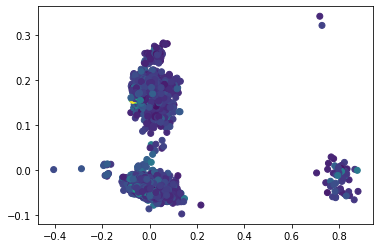

In [40]:
plt.scatter(x_pca[:, 1], x_pca[:, 0], c=y_train)

In [52]:
params_grid_SVM = {'C': np.arange(10, 15, 0.1)  
                  }
supp_vec_machine2 = svm.LinearSVR(random_state=42)
GS_SVM = GridSearchCV(supp_vec_machine2, params_grid_SVM, cv=cv, scoring='neg_mean_squared_error')
GS_SVM.fit(x_pca, y_train)
SVM_GS_y = GS_SVM.predict(x_pca_t)

In [53]:
sm.r2_score(y_test, SVM_GS_y)

-0.00910724596769863